# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Load DataSet

In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


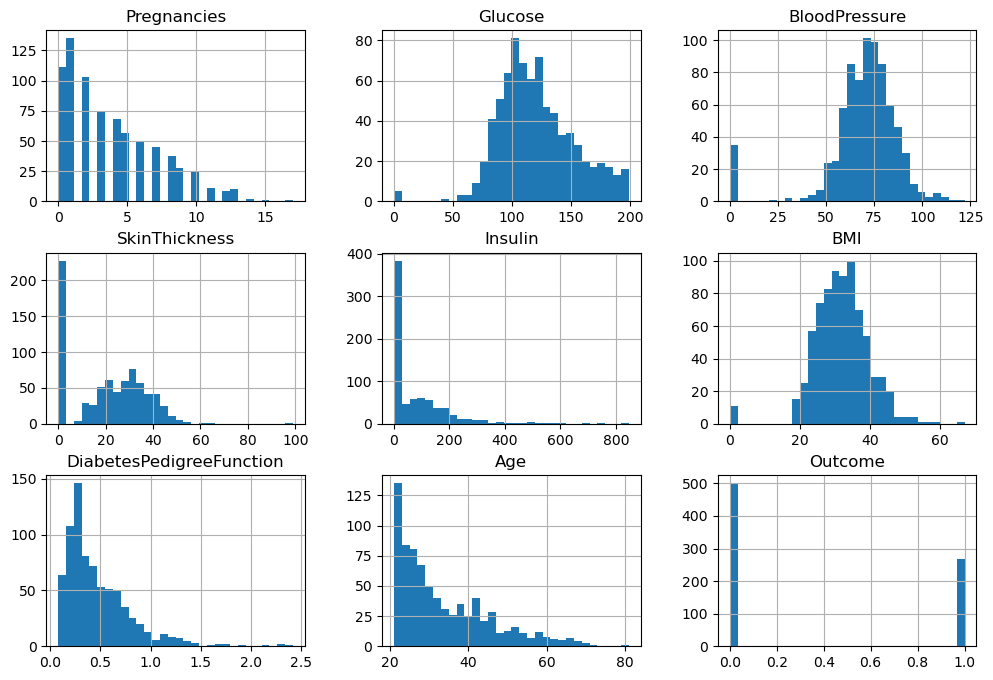

In [121]:
df.hist(bins=30, figsize=(12, 8))
plt.show()


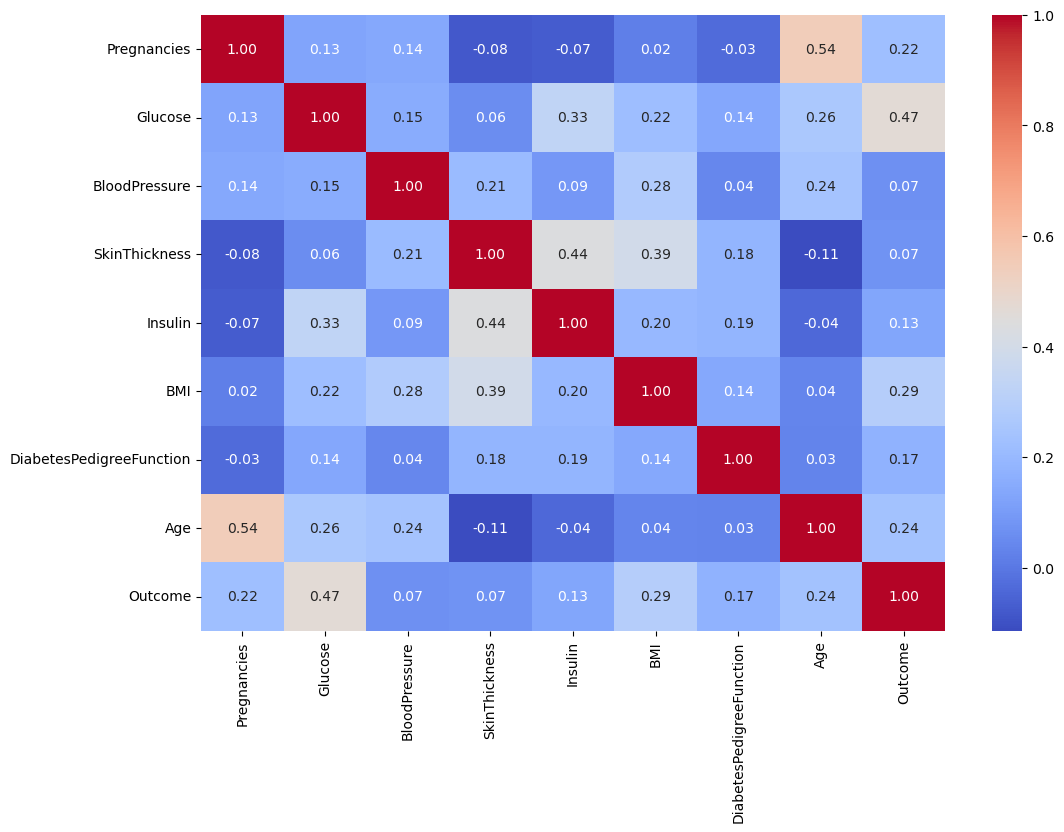

In [125]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# training our Data

In [7]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [8]:
cols=x.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mn=MinMaxScaler()

In [11]:
x=mn.fit_transform(x)
x=pd.DataFrame(x,columns=cols)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,shuffle=True,stratify=y)

In [14]:
import statsmodels.api as sm

In [15]:
x_train=sm.add_constant(x_train)

In [16]:
model=sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -270.05
Date:                Tue, 27 Aug 2024   Deviance:                       540.10
Time:                        13:04:41   Pearson chi2:                     673.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2995
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.3262      0.824    -10.111      0.000      -9.940      -6.712
Pregnancies                  2.2588      0.639      3.532      0.000       1.006       3.512
Glucose                      7.1055      0.865      8.210      0.000       5.409       8.802
BloodPressure               -1.3828      0.743     -1.862      0.063      -2.839       0.073
SkinThickness               -0.0418      0.802     -0.052      0.958      -1.613       1.530
Insulin                     -0.6901      1.003     -0.688      0.491      -2.656       1.276
BMI                          6.3471      1.189      5.339      0.000       4.017       8.677
DiabetesPedigreeFunction     1.6997      0.801      2.121      0.034       0.129       3.270
Age                          0.7630      0.626      1.218      0.223      -0.465       1.991
============================================================================================
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif={x_train.columns[i]:variance_inflation_factor(x_train,i)for i in range(1,x_train.shape[1])}

In [20]:
vif

{'Pregnancies': 1.3918804732531957,
 'Glucose': 1.3314599102674618,
 'BloodPressure': 1.1509363549248932,
 'SkinThickness': 1.516159499611598,
 'Insulin': 1.5376146112918772,
 'BMI': 1.2605346835387135,
 'DiabetesPedigreeFunction': 1.0828145844584198,
 'Age': 1.5475891722354709}

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg= LogisticRegression()

In [23]:
from sklearn.feature_selection import RFE

In [24]:
rfe= RFE(estimator=lg,n_features_to_select=20)

In [25]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [26]:
rfe.estimator_

LogisticRegression()

In [27]:
x_train=x_train[x_train.columns[rfe.support_]]

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg=LogisticRegression(random_state=0)

In [30]:
lg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [31]:
x_test=sm.add_constant(x_test)

In [32]:
x_test=x_test[x_test.columns[rfe.support_]]

In [33]:
lg.score(x_train,y_train)

0.7881944444444444

In [34]:
lg.score(x_test,y_test)

0.7447916666666666

In [35]:
lg_prob=lg.predict_proba(x_test)

In [36]:
lg_prob=lg_prob[:,1]

In [37]:
result=pd.DataFrame(lg_prob,columns=["Lg_Prob"])

In [38]:
result

,Lg_Prob
0,0.413581
1,0.360688
2,0.160198
3,0.434130
4,0.695742
...,...
187,0.066477
188,0.257326
189,0.235535
190,0.350988


In [39]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dc=DecisionTreeClassifier()

In [42]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
dc.score(x_train,y_train)

1.0

In [44]:
dc.score(x_test,y_test)

0.734375

In [45]:
dc_prob= dc.predict_proba(x_test)[:,1]

In [46]:
result["DTC_prob"]= dc_prob

In [47]:
result

,Lg_Prob,DTC_prob
0,0.413581,0.0
1,0.360688,1.0
2,0.160198,0.0
3,0.434130,0.0
4,0.695742,1.0
...,...,...
187,0.066477,0.0
188,0.257326,0.0
189,0.235535,0.0
190,0.350988,0.0


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=5,metric="manhattan")

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [51]:
knn.score(x_train,y_train)

0.8159722222222222

In [52]:
knn.score(x_test,y_test)

0.7083333333333334

In [53]:
train_score=[]
test_score=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [54]:
train_score

[1.0,
 0.8315972222222222,
 0.8454861111111112,
 0.8090277777777778,
 0.8159722222222222,
 0.7899305555555556,
 0.7916666666666666,
 0.7795138888888888,
 0.7864583333333334]

In [55]:
test_score

[0.6979166666666666,
 0.7135416666666666,
 0.6927083333333334,
 0.71875,
 0.7083333333333334,
 0.7239583333333334,
 0.734375,
 0.7552083333333334,
 0.75]

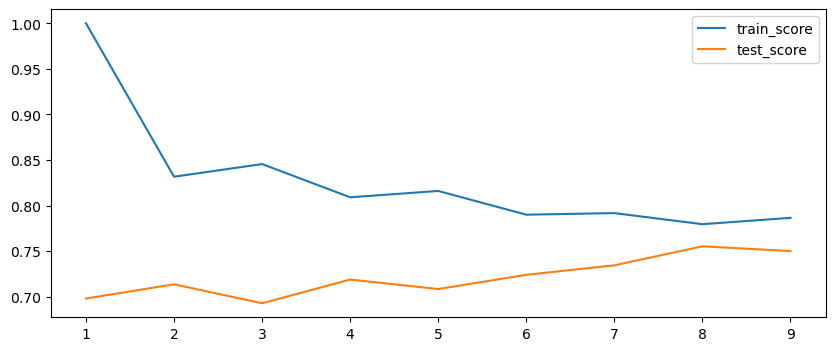

In [56]:
rg=list(range(1,10))
plt.figure(figsize=(10,4))
plt.plot(rg,train_score,label="train_score")
plt.plot(rg,test_score,label="test_score")
plt.legend()
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=8,metric="manhattan")

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [59]:
knn.score(x_train,y_train)

0.7795138888888888

In [60]:
knn.score(x_test,y_test)

0.7552083333333334

In [61]:
knn_prob=knn.predict_proba(x_test)[:,1]

In [62]:
result["KNN_Prob"]=knn_prob

In [63]:
result

,Lg_Prob,DTC_prob,KNN_Prob
0,0.413581,0.0,0.125
1,0.360688,1.0,0.250
2,0.160198,0.0,0.125
3,0.434130,0.0,0.250
4,0.695742,1.0,0.750
...,...,...,...
187,0.066477,0.0,0.000
188,0.257326,0.0,0.375
189,0.235535,0.0,0.250
190,0.350988,0.0,0.375


In [64]:
result["Prob_avg"]=(result["KNN_Prob"]+result["DTC_prob"]+result["Lg_Prob"])/3

In [65]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg
0,0.413581,0.0,0.125,0.179527
1,0.360688,1.0,0.250,0.536896
2,0.160198,0.0,0.125,0.095066
3,0.434130,0.0,0.250,0.228043
4,0.695742,1.0,0.750,0.815247
...,...,...,...,...
187,0.066477,0.0,0.000,0.022159
188,0.257326,0.0,0.375,0.210775
189,0.235535,0.0,0.250,0.161845
190,0.350988,0.0,0.375,0.241996


In [66]:
vr=[]
for i in result["Prob_avg"]:
    if i<0.5:
        vr.append(0)
    else:
        vr.append(1)

In [67]:
result["Output"]=vr

In [68]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output
0,0.413581,0.0,0.125,0.179527,0
1,0.360688,1.0,0.250,0.536896,1
2,0.160198,0.0,0.125,0.095066,0
3,0.434130,0.0,0.250,0.228043,0
4,0.695742,1.0,0.750,0.815247,1
...,...,...,...,...,...
187,0.066477,0.0,0.000,0.022159,0
188,0.257326,0.0,0.375,0.210775,0
189,0.235535,0.0,0.250,0.161845,0
190,0.350988,0.0,0.375,0.241996,0


In [69]:
result['Actual_value']=np.array(y_test)

In [70]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output,Actual_value
0,0.413581,0.0,0.125,0.179527,0,1
1,0.360688,1.0,0.250,0.536896,1,0
2,0.160198,0.0,0.125,0.095066,0,0
3,0.434130,0.0,0.250,0.228043,0,1
4,0.695742,1.0,0.750,0.815247,1,1
...,...,...,...,...,...,...
187,0.066477,0.0,0.000,0.022159,0,0
188,0.257326,0.0,0.375,0.210775,0,0
189,0.235535,0.0,0.250,0.161845,0,0
190,0.350988,0.0,0.375,0.241996,0,1


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,fbeta_score,auc

In [72]:
con= confusion_matrix(result["Actual_value"],result["Output"])
print(con)

[[108  17]
 [ 28  39]]


In [73]:
pr= precision_score(result["Actual_value"],result["Output"])
pr

0.6964285714285714

In [74]:
re= recall_score(result["Actual_value"],result["Output"])
re

0.582089552238806

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
acc= accuracy_score(result["Actual_value"],result["Output"])
acc

0.765625

In [77]:
f1=f1_score(result["Actual_value"],result["Output"])
f1

0.6341463414634148

In [78]:
fbeta=fbeta_score(result["Actual_value"],result["Output"],beta=0.5)
fbeta

0.6701030927835051

In [79]:
from sklearn import metrics

In [80]:
probs=knn.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

In [81]:
preds

array([0.125, 0.25 , 0.125, 0.25 , 0.75 , 0.25 , 0.125, 0.375, 0.875,
       0.   , 0.125, 0.75 , 0.125, 0.   , 0.375, 0.75 , 0.75 , 0.125,
       0.25 , 0.25 , 0.   , 0.375, 0.   , 0.875, 0.875, 0.625, 0.125,
       0.   , 0.75 , 0.75 , 0.125, 0.25 , 0.   , 0.125, 0.5  , 0.125,
       0.25 , 0.   , 0.25 , 0.   , 0.75 , 0.   , 0.125, 0.5  , 0.625,
       0.375, 0.75 , 0.375, 0.5  , 0.875, 0.25 , 0.5  , 0.625, 0.   ,
       0.5  , 0.75 , 0.75 , 0.125, 0.375, 0.5  , 0.625, 0.625, 0.625,
       0.   , 0.   , 1.   , 0.25 , 0.375, 0.   , 0.375, 0.125, 0.25 ,
       0.75 , 0.25 , 0.   , 0.125, 0.375, 0.375, 0.   , 0.   , 0.   ,
       0.75 , 0.   , 0.   , 0.75 , 0.625, 0.   , 0.125, 0.375, 0.   ,
       0.   , 0.5  , 0.   , 0.   , 0.125, 0.   , 0.25 , 0.125, 0.125,
       0.125, 0.5  , 0.5  , 0.125, 0.125, 1.   , 0.25 , 0.375, 0.5  ,
       0.75 , 0.375, 0.25 , 0.   , 0.125, 0.625, 0.875, 0.125, 0.375,
       0.375, 0.125, 0.625, 0.5  , 0.625, 0.125, 0.   , 0.25 , 0.375,
       0.25 , 0.5  ,

In [82]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output,Actual_value
0,0.413581,0.0,0.125,0.179527,0,1
1,0.360688,1.0,0.250,0.536896,1,0
2,0.160198,0.0,0.125,0.095066,0,0
3,0.434130,0.0,0.250,0.228043,0,1
4,0.695742,1.0,0.750,0.815247,1,1
...,...,...,...,...,...,...
187,0.066477,0.0,0.000,0.022159,0,0
188,0.257326,0.0,0.375,0.210775,0,0
189,0.235535,0.0,0.250,0.161845,0,0
190,0.350988,0.0,0.375,0.241996,0,1


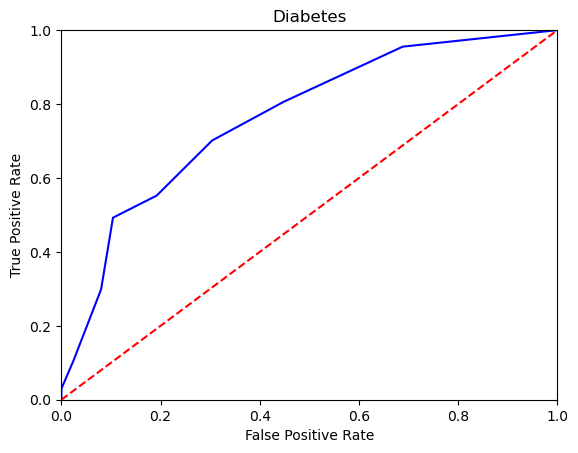

In [83]:
plt.title('Diabetes')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [85]:
model_dic={"Random_Forest_Classifier":RandomForestClassifier(), 
"Ada_Boost_Classifier":AdaBoostClassifier(),
"Gradient_Boosting_Classifier":GradientBoostingClassifier(),
"Decision_Tree_Classifier":DecisionTreeClassifier(),
"Logistic_Regression":LogisticRegression()}

In [86]:
train_score={}
test_score={}
train_prob={}
test_prob={}
for name,model in model_dic.items():
    model.fit(x_train,y_train)
    train_score[name]=model.score(x_train,y_train)
    test_score[name]=model.score(x_test,y_test)
    train_t= model.predict_proba(x_train)
    test_t=model.predict_proba(x_test)
    train_prob[name]=train_t[:,1]
    test_prob[name]=test_t[:,1]

In [87]:
train_score

{'Random_Forest_Classifier': 1.0,
 'Ada_Boost_Classifier': 0.8524305555555556,
 'Gradient_Boosting_Classifier': 0.9322916666666666,
 'Decision_Tree_Classifier': 1.0,
 'Logistic_Regression': 0.7881944444444444}

In [88]:
test_score

{'Random_Forest_Classifier': 0.75,
 'Ada_Boost_Classifier': 0.734375,
 'Gradient_Boosting_Classifier': 0.7239583333333334,
 'Decision_Tree_Classifier': 0.734375,
 'Logistic_Regression': 0.7447916666666666}

In [89]:
result=pd.DataFrame(train_score.keys(),columns=["Model_name"])
result["Train_Evaluation_value"]=train_score.values()
result["Test_Evaluation_value"]=test_score.values()

In [90]:
result

,Model_name,Train_Evaluation_value,Test_Evaluation_value
0,Random_Forest_Classifier,1.000000,0.750000
1,Ada_Boost_Classifier,0.852431,0.734375
2,Gradient_Boosting_Classifier,0.932292,0.723958
3,Decision_Tree_Classifier,1.000000,0.734375
4,Logistic_Regression,0.788194,0.744792


In [91]:
probability_score=pd.DataFrame(train_prob.keys(),columns=["Model_Name"])
probability_score["Train_prob"]=train_prob.values()

In [92]:
probability_score_test=pd.DataFrame(test_prob.values())
probability_score_test=probability_score_test.T

In [93]:
probability_score_test=probability_score_test.rename(columns={0:'Random_Forest_Classifier',1:'Ada_Boost_Classifier',
                                                    2:'Gradient_Boosting_Classifier',3:'Decision_Tree_Classifier',
                                                    4:'Logistic_Regression'})

In [94]:
probability_score_test.columns

Index(['Random_Forest_Classifier', 'Ada_Boost_Classifier',
       'Gradient_Boosting_Classifier', 'Decision_Tree_Classifier',
       'Logistic_Regression'],
      dtype='object')

In [95]:
fpr_rfr, tpr_rfr, threshold_rfr = metrics.roc_curve(y_test,probability_score_test["Random_Forest_Classifier"] )
roc_auc_rfr = metrics.auc(fpr_rfr, tpr_rfr)
fpr_Ada_Boost, tpr_Ada_Boost, threshold_Ada_Boost = metrics.roc_curve(y_test,probability_score_test["Ada_Boost_Classifier"] )
roc_auc_Ada_Boost = metrics.auc(fpr_Ada_Boost, tpr_Ada_Boost)
fpr_Gradient, tpr_Gradient, threshold_Gradient = metrics.roc_curve(y_test,probability_score_test["Gradient_Boosting_Classifier"] )
roc_auc_Gradient = metrics.auc(fpr_Gradient, tpr_Gradient)
fpr_Decision, tpr_Decision, threshold_Decision = metrics.roc_curve(y_test,probability_score_test["Decision_Tree_Classifier"] )
roc_auc_Decision = metrics.auc(fpr_Decision, tpr_Decision)
fpr_Logistic, tpr_Logistic, threshold_Logistic = metrics.roc_curve(y_test,probability_score_test["Logistic_Regression"] )
roc_auc_Logistic = metrics.auc(fpr_Logistic, tpr_Logistic)

In [96]:
print("Random_Forest_Classifier",roc_auc_rfr)
print("Ada_Boost_Classifier",roc_auc_Ada_Boost)
print("Gradient_Boosting_Classifier",roc_auc_Gradient)
print("Decision_Tree_Classifier",roc_auc_Decision)
print("Logistic_Regression",roc_auc_Logistic)

Random_Forest_Classifier 0.819044776119403
Ada_Boost_Classifier 0.8225074626865673
Gradient_Boosting_Classifier 0.8251940298507463
Decision_Tree_Classifier 0.6851940298507463
Logistic_Regression 0.8254328358208955


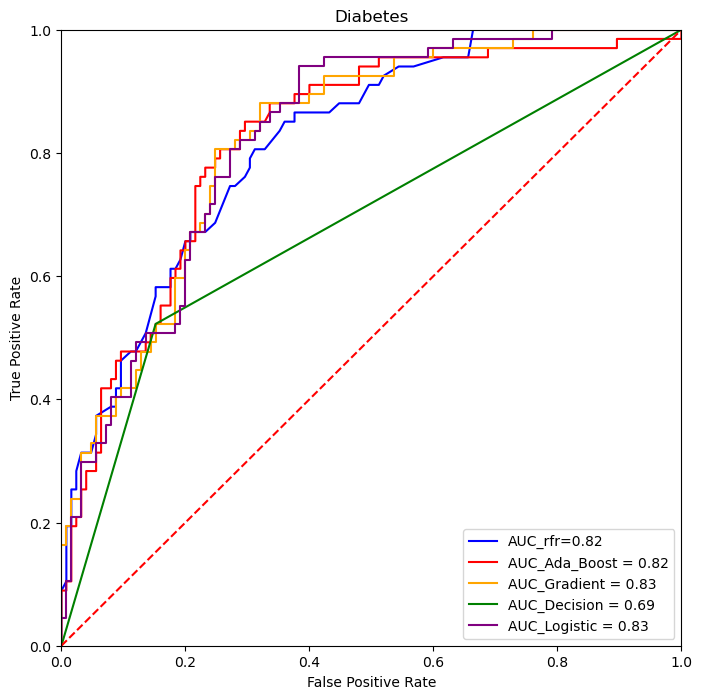

In [97]:
plt.figure(figsize=(8,8))
plt.title('Diabetes')
plt.plot(fpr_rfr,tpr_rfr,'b',label='AUC_rfr=%0.2f' %roc_auc_rfr)
plt.plot(fpr_Ada_Boost, tpr_Ada_Boost, 'r', label = 'AUC_Ada_Boost = %0.2f' % roc_auc_Ada_Boost)
plt.plot(fpr_Gradient, tpr_Gradient, 'orange', label = 'AUC_Gradient = %0.2f' % roc_auc_Gradient)
plt.plot(fpr_Decision, tpr_Decision, 'green', label = 'AUC_Decision = %0.2f' % roc_auc_Decision)
plt.plot(fpr_Logistic, tpr_Logistic, 'purple', label = 'AUC_Logistic = %0.2f' % roc_auc_Logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr=LinearRegression()

In [100]:
from sklearn.feature_selection import RFE

In [101]:
rfe= RFE(estimator=lr,n_features_to_select=20)

In [102]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [103]:
rfe.estimator_

LinearRegression()

In [104]:
x_train=x_train[x_train.columns[rfe.support_]]

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr=LogisticRegression(random_state=0)

In [107]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [108]:
x_test=sm.add_constant(x_test)

In [109]:
x_test=x_test[x_test.columns[rfe.support_]]

In [110]:
lr.score(x_train,y_train)

0.7881944444444444

In [111]:
lr.score(x_test,y_test)

0.7447916666666666

In [112]:
lr=lr.predict(x_test)

In [113]:
Lr= pd.DataFrame(pred,columns=["Predictions"])

In [114]:
Lr["Actual_Data"]= np.array(y_test)

In [115]:
Lr

,Predictions,Actual_Data
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
187,0,0
188,0,0
189,0,0
190,0,1


In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
cn= confusion_matrix(pred,y_test)
print(cn)

[[110  34]
 [ 15  33]]


# Conclusions
1. Identify important features and their relationships with the target variable. For example, if the target variable is Outcome, look at how features like Glucose, BMI, or Age correlate with it.
2. Assess any issues with missing values, data types, or outliers.

# Recommendations:
1. Feature Importance: Focus on features like Glucose, BMI, and Age for predictive modeling as they show strong relationships with the target variable.
2. Model Selection: Use logistic regression, decision trees, or other classification algorithms suitable for predicting binary outcomes.
3. Further Analysis: Explore feature interactions and possibly apply feature scaling or normalization to improve model performance.

# Summary: 
The diabetes.csv dataset includes several features such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age, with the target variable being Outcome.
1. Distributions: Most numerical features are normally distributed or skewed. For instance, Glucose levels show a range that might suggest important predictive information.
2. Correlations: The Glucose, BMI, and Age features have significant correlations with the Outcome, indicating their importance in predicting diabetes.
3. Missing Values: No missing values were found, but it's always good to double-check.